# Final report task / 最終レポート課題

## Create your own dataset / あなた自身のデータセットを作成する

You should find an interesting question to which classification can be applied. It can be any topic familiar to you, such as something based your interests and hobies. You can collect data from your lab, from your friends, from the internet, from your surroundings, etc.

__This must not be just a dataset that is already published or readily available on the internet. Also, do not use the same topic as other students, and do not use datasets created by others.__

Any type of data is fine. 
However, we expect the following: 

- to properly solve a machine learning problem the dataset should have enough data. For this report, there should be at least enough data to be able to test the machine learning. (the dataset does not have to be very large, but 20 is the bare minimum)

- there should be enough meaningful features (it is preffered that you have multiple inputs)


分類を適用できる面白い問題を見つけてください。興味や趣味に基づいたものなど、身近な問題で構いません。データを収集できる方法がいろいろあります：研究室から、友達から、インターネットから、周囲から。

__なお、すでに公開されている、またはインターネットから簡単にダウンロードできるデータセットは使えません。また、他の学生と同じ問題を使わず、他人が作成したデータセットも使用しないでください。__

データはなんでも大丈夫です。
しかし、以下のことを期待しています：

 - しっかりとした機械学習のためにはデータセットは十分なデータを持っている必要があります。今回のレポートのためには、少なくてもアイデアを試して機械学習が成り立つ程度にはデータを集める必要があります。（それほど大きくなくても構いませんが、少なくても２０は必要でしょう）

 - 各データに意味のある特徴量が十分にある必要があります（複数の入力のほうが望ましいです）

### Description of the dataset / データセットについて

Shortly describe the problem and the dataset in the cell below.

下のセルを使ってに見つけった問題やデータセットについて簡単に説明してください。


--- 
 
焼き餃子（yaki）と水・蒸し餃子（notyaki）を画像から分類する  
焼き餃子のデータが25枚、水・蒸し餃子のデータが25枚  
観察：画像  
特徴：yaki --> 0、notyaki --> 1

---

## Data / データ

### Load the data / データの読み込み

In the cell below load your data.

下のセルにデータを読み込んでください。

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os, glob
from PIL import Image
from tensorflow.keras.preprocessing import image

import tensorflow as tf

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical

<class 'PIL.Image.Image'>
<class 'numpy.ndarray'>
(224, 224, 3)


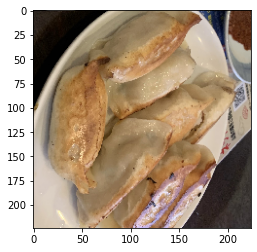

In [2]:
#練習
img_path = './data/yaki/yaki1.jpeg'
img = image.load_img(img_path, target_size=(224, 224))

plt.imshow(img);
print(type(img))
x = image.img_to_array(img)
print(type(x))
print(x.shape)

### Plot the data / データのプロット

Visualize your data using plots.

プロットをつかてデータを可視化してください。

### Prepare the data / データの準備

Do all the necessary preprocessing (dividing into training and test data, standardizing).

必要な前処理を実行してください（トレーニングデータとテストデータへの分割、標準化など）。

In [3]:
#-----クラスの作成と画像サイズの指定
#クラスを作成
classes = ["yaki", "notyaki"]

#クラスの数（＝2）
num_classes = len(classes)

#-----画像データの編集と数値化
#画像データの配列を用意
X = []
#ラベルのデータを用意
y = []

#画像データとラベルデータに分割
for index, classlabel in enumerate(classes):
    
    #画像のディレクトリ名
    photo_dir = "./data/" + classlabel
    
    #画像を一枚ずつ取得
    files = glob.glob(photo_dir + "/*")
    
    #写真をRGB化し，変更を加える
    for i, file in enumerate(files):
        
        #画像を開く
        image = Image.open(file)
        
        #RGB化する
        image = image.convert("RGB")
        
        #サイズをリサイズする
        image = image.resize((50,50))
        
        #画像データを数字に変換する
        data = np.asarray(image)
        
        X.append(data)

        y.append(index)
        
#XとYをnumpy形式に変換する（TensorFlowでは，numpy形式の方が扱いやすい）
X = np.array(X)

y = np.array(y)

In [4]:
#学習用とテスト用に分割
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])
print(X_train.shape[0]/X_test.shape[0])

Training set size: 35
Testing set size: 15
2.3333333333333335


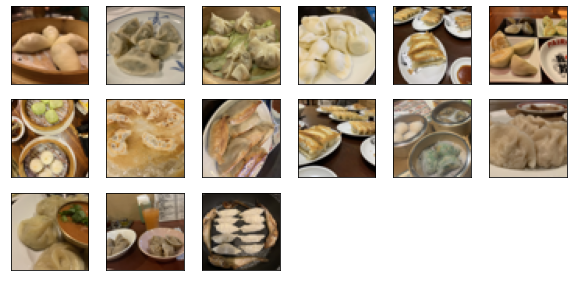

In [5]:
def plot_imgs(input_imgs):
    plt.figure(figsize=(10,10))
    plt_idx = 1
    for i in range(15):
        plt.subplot(6,6,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(np.squeeze(input_imgs[i]), cmap="gray", vmin=0, vmax=1)
    plt.show()

plot_imgs(X_test)

In [6]:
print(y_test)

[1 1 1 1 0 0 1 0 0 0 1 1 1 1 0]


In [7]:
# The pixel values are in the range [0, 255], we will limit them to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (35, 50, 50, 3)
Testing set size: (15, 50, 50, 3)


## Classification / 分類

### Training of the classifier / 分類器の訓練

Train one or more classification methods on your training data.

You can use any classification method (SVM, neural network, etc.). The important thing is that you _try solving the problem by yourself and get the best possible result_. If you are working on a hard problem it is not important that the final accuracy you achieve is very high.

トレーニングデータに基づいて1つ（または複数）の分類器をトレーニングしてください。

任意の分類方法（SVM、ニューラルネットワークなど）を使用できます。 重要なことは、あなたが自分で問題を解決してできるだけ良い結果を得ることです。認識が難しい問題なら、最終的な精度がそれほど高くなくても構いません。

In [8]:
## YOUR CODE HERE (Add more cells if needed.)

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical

In [9]:
input_shape = X_train[0].shape
img_input = Input(shape = input_shape, name='input')

In [10]:
conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu', name='conv1')(img_input)
conv2 = Conv2D(64, (3, 3), activation='relu', name='conv2')(conv1)
pool = MaxPooling2D(pool_size=(2, 2), name='pool')(conv2)
dp1 = Dropout(0.25)(pool)
fl = Flatten()(dp1)
fc1 = Dense(128, activation='relu', name="fc1")(fl)
dp2 = Dropout(0.5)(fc1)
fc2 = Dense(10, activation='softmax', name="fc2")(dp2)
network = Model(img_input, fc2, name='CNN_classification')
network.summary()


Model: "CNN_classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 50, 50, 3)]       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 48, 48, 32)        896       
_________________________________________________________________
conv2 (Conv2D)               (None, 46, 46, 64)        18496     
_________________________________________________________________
pool (MaxPooling2D)          (None, 23, 23, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0         
_________________________________________________________________
fc1 (Dense)                  (None, 128)        

2022-05-08 09:00:12.835857: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-08 09:00:12.836572: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [11]:
network.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['acc'])

In [12]:
history = network.fit(X_train, y_train, epochs=20, batch_size=32,validation_data=(X_test, y_test))

Train on 35 samples, validate on 15 samples
Epoch 1/20
35/35 [==============================] - 1s 41ms/sample - loss: 5.5394 - acc: 0.1143 - val_loss: 22.7944 - val_acc: 0.6000
Epoch 2/20
35/35 [==============================] - 1s 17ms/sample - loss: 28.2580 - acc: 0.4571 - val_loss: 1.0388 - val_acc: 0.5333
Epoch 3/20
35/35 [==============================] - 1s 16ms/sample - loss: 1.3303 - acc: 0.5429 - val_loss: 1.9363 - val_acc: 0.4000
Epoch 4/20
35/35 [==============================] - 1s 16ms/sample - loss: 1.4801 - acc: 0.5714 - val_loss: 0.7738 - val_acc: 0.6000
Epoch 5/20
35/35 [==============================] - 1s 17ms/sample - loss: 1.1520 - acc: 0.4286 - val_loss: 0.6776 - val_acc: 0.6000
Epoch 6/20
35/35 [==============================] - 1s 16ms/sample - loss: 0.7600 - acc: 0.4571 - val_loss: 0.6835 - val_acc: 0.6000
Epoch 7/20
35/35 [==============================] - 1s 16ms/sample - loss: 0.6950 - acc: 0.6000 - val_loss: 0.9966 - val_acc: 0.4000
Epoch 8/20
35/35 [=====

### Show results / 結果の表示

Print/plot the results of applying the classifier on the test set (accuracy, confusion matrix, etc.).

ここでテストセットに分類器を適用した結果を印刷/プロットしてください（精度、混同行列など）。

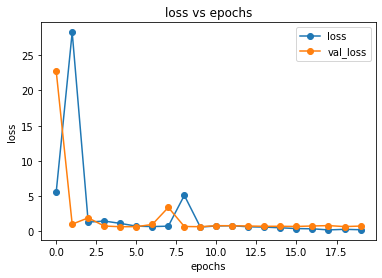

In [13]:
## YOUR CODE HERE (Add more cells if needed.)
#loss
plt.plot(history.history['loss'], 'o-',label="loss")
plt.plot(history.history['val_loss'], 'o-', label="val_loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("loss vs epochs")
plt.legend();

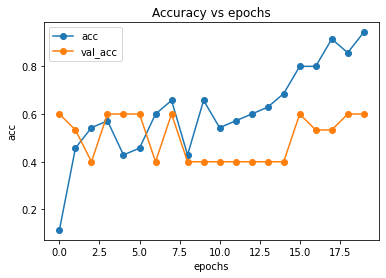

In [14]:
#acc
plt.plot(history.history['acc'], 'o-', label="acc")
plt.plot(history.history['val_acc'], 'o-', label="val_acc")
plt.xlabel("epochs")
plt.ylabel("acc")
plt.title("Accuracy vs epochs")
plt.legend();

In [15]:
y_test_pred_one_hot = network.predict(X_test)
y_test_pred = np.argmax(y_test_pred_one_hot, axis=1)
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_test_pred)
print(CM)

[[3 3]
 [3 6]]


In [16]:
A = np.sum(np.diag(CM)) / np.sum(CM)
print("Accuracy = {:.02f}".format(A))

Accuracy = 0.60


In [17]:
number_samples = X.shape[0]
test_samples = int(0.3 * number_samples)
imgs_test =X[:test_samples]

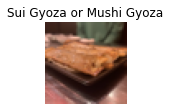

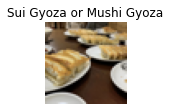

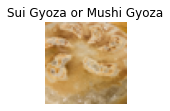

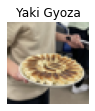

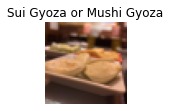

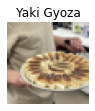

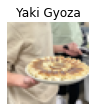

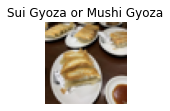

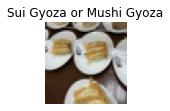

In [18]:
correct_indices = np.where(y_test_pred == y_test)[0]
for i in correct_indices:
    plt.figure(figsize=(1.5,1.5))
    plt.imshow(X[i, :, :, :])
    plt.axis('off')
    if y_test[i] == 0:
        title = "Yaki Gyoza"
    else:
        title = "Sui Gyoza or Mushi Gyoza"
    plt.title(title)

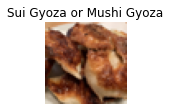

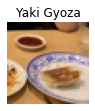

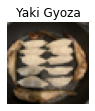

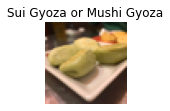

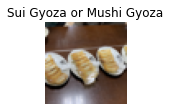

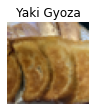

In [19]:
error_indices = np.where(y_test_pred != y_test)[0]
for i in error_indices:
    plt.figure(figsize=(1.5,1.5))
    plt.imshow(X[i, :, :, :])
    plt.axis('off')
    if y_test[i] == 0:
        title = "Yaki Gyoza"
    else:
        title = "Sui Gyoza or Mushi Gyoza"
    plt.title(title)

## Conclusion / 結論

Write a brief conclusion about the obtained results below.

以下に得られた結果についての簡単な結論を書いてください。

--- 

焼き餃子を焼き餃子と正しく判断できる割合が60%  
データ数が増えれば精度はもっと上がると期待できる。

---

## How to submit / 提出手順

You need to submit:

- the dataset you prepared

- this notebook (.ipynb file)

- this notebook as HTML file (`File -> Download as -> HTML (.html)`)

- any other file that is necessary to run the notebook (if any)

Make a archive file and submit it through PandA.


以下の全てを提出してください：

- 用意したデータセット

- このノートブック（.ipynbファイル）

- HTML形式に変換したノートブック（`File -> Download as -> HTML (.html)`）

- もしあれば、ノートブックを実行するために必要なその他のファイル

圧縮ファイルを作成し、PandAで提出してください。